In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 37.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
from ultralytics import YOLO
import shutil
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
shutil.copytree('/content/drive/MyDrive/Cancer_Cell_Detection/Samples','/content/Samples')
shutil.copytree('/content/drive/MyDrive/Cancer_Cell_Detection/runs','/content/runs')

'/content/runs'

In [ ]:
model=YOLO('/content/runs/detect/train/weights/best.pt')


image 1/1 /content/Samples/1703.bmp: 512x640 3 Cancer_Cell_parts, 347.1ms
Speed: 16.7ms preprocess, 347.1ms inference, 29.9ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/Samples/505.bmp: 480x640 4 Cancer_Cell_parts, 169.9ms
Speed: 3.9ms preprocess, 169.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/Samples/1710.bmp: 512x640 6 Cancer_Cell_parts, 170.5ms
Speed: 4.0ms preprocess, 170.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/Samples/607.bmp: 480x640 3 Cancer_Cell_parts, 174.3ms
Speed: 4.1ms preprocess, 174.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


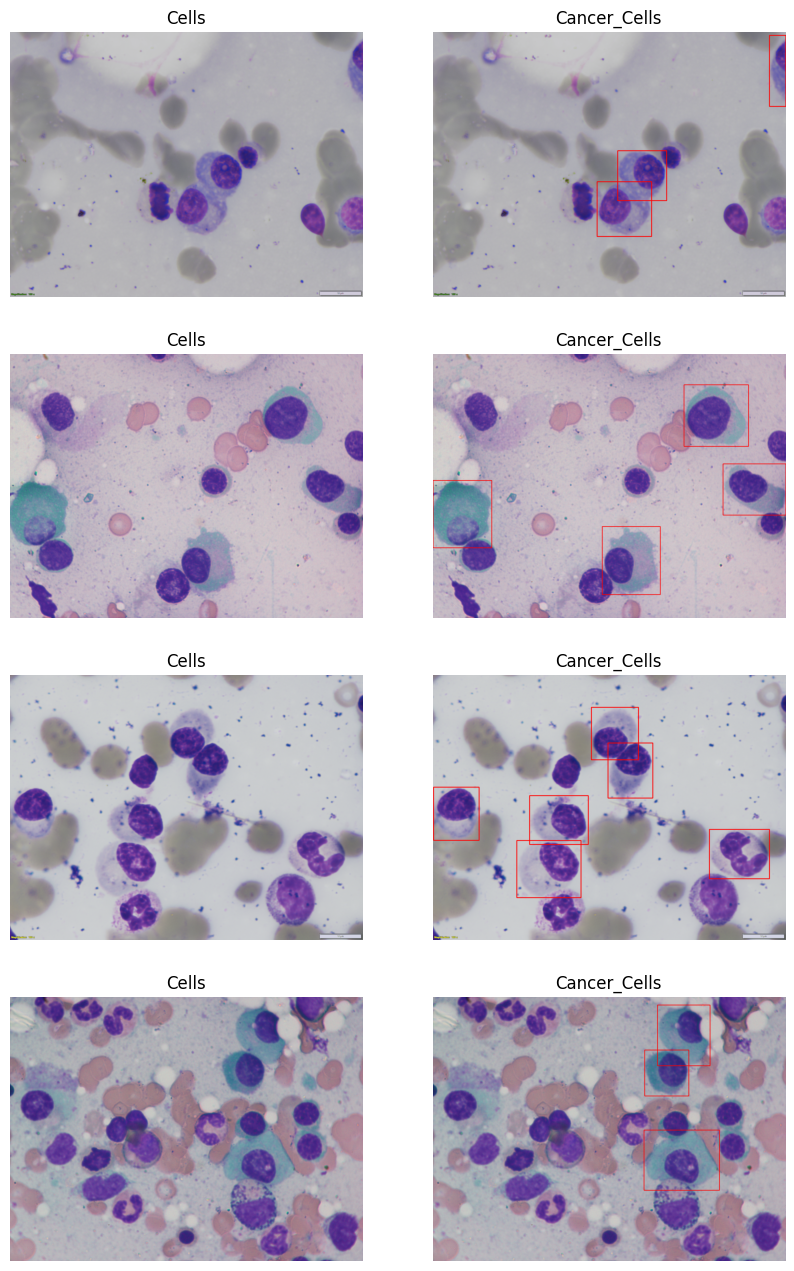

In [ ]:
Test_dir='/content/Samples'
rows=len(os.listdir(Test_dir))
fig=plt.figure(figsize=(10,rows*4))
columns=2
i=1
for file in os.listdir(Test_dir):
    file_path=Test_dir+"/"+file
    img=cv2.imread(file_path)
    fig.add_subplot(rows,columns,i).title.set_text("Cells")
    i=i+1
    plt.axis('off')
    plt.imshow(img[:,:,::-1])

    for [x1,y1,x2,y2] in model.predict(file_path)[0].boxes.xyxy:
      x1=int(x1)
      x2=int(x2)
      y1=int(y1)
      y2=int(y2)
      image = cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 4)

    fig.add_subplot(rows,columns,i).title.set_text("Cancer_Cells")
    i=i+1
    plt.axis('off')
    plt.imshow(image[:,:,::-1])
